In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
 df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Height')

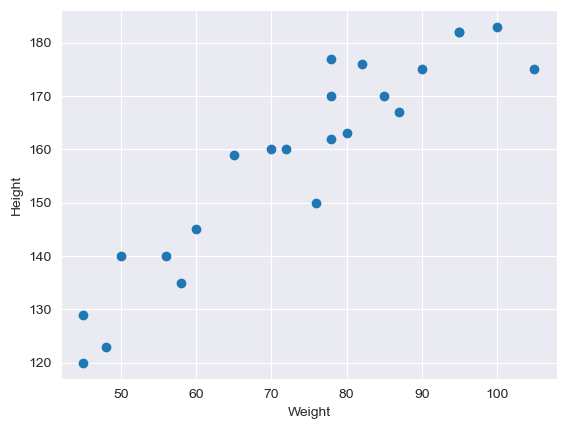

In [11]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [13]:
##devide my dataset into independent and dependent

In [28]:
X=df[['Weight']]
Y=df['Height']

In [15]:
X

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [16]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20 ,random_state=42)

In [30]:
X.shape

(23, 1)

In [31]:
x_train.shape


(18, 1)

In [25]:
##standardization data set only train independent feature
from sklearn.preprocessing import StandardScaler


In [26]:
scaler=StandardScaler()

In [42]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [44]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [43]:
x_test

array([[ 0.34927086],
       [ 0.34927086],
       [-1.63795991],
       [ 1.37299581],
       [-0.43357762]])

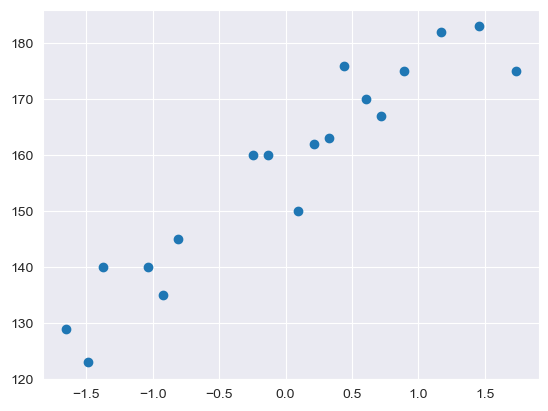

In [45]:
plt.scatter(x_train,y_train)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
regressior=LinearRegression()

In [48]:
regressior.fit(x_train,y_train)

LinearRegression()

In [50]:
print("the slope coefficent ",regressior.coef_)

the slope coefficent  [17.03440872]


In [51]:
print("Intercerpt ",regressior.intercept_)

Intercerpt  157.5


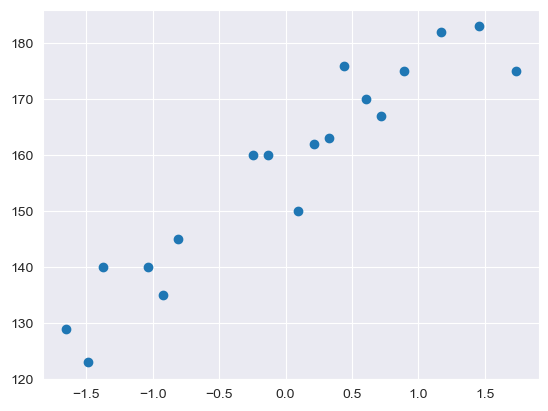

In [52]:
plt.scatter(x_train,y_train)

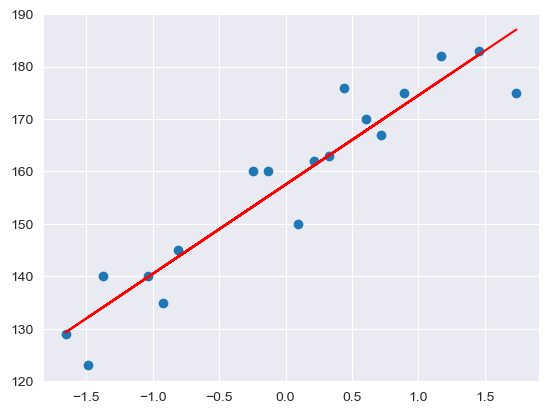

In [56]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressior.predict(x_train),'r')

In [57]:
y_pred_test=regressior.predict(x_test)

In [60]:
y_pred_test,y_test

(array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
        150.11426154]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

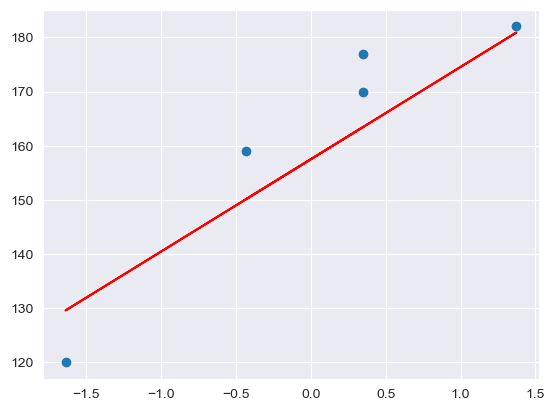

In [61]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressior.predict(x_test),'r')

In [62]:
##performance matrix

In [63]:
###calcuating MSe,MAE,RMSE
#r squre and adjust r square


In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [70]:

mae=mean_absolute_error(y_test,y_pred_test)

In [71]:
mae

7.9393285483063725

In [67]:
mse=mean_squared_error(y_test,y_pred_test)

In [68]:
mse

79.76809057832979

In [72]:
rmse=np.sqrt(mse)

In [73]:
rmse

8.931298370244372

In [74]:
from sklearn.metrics  import  r2_score

In [76]:
score=r2_score(y_test,y_pred_test)

In [77]:
score

0.8379487839705635

In [78]:
adjr2=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [79]:
adjr2

0.7839317119607513

In [80]:
#testing model

In [86]:
scaled_weight=scaler.fit_transform([[80]])

In [87]:
scaled_weight

array([[0.]])

In [88]:
print(regressior.predict([scaled_weight[0]]))

[157.5]
